In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread("C:\\Users\\JERRY\\Downloads\\Computer-Vision-with-Python\\Computer-Vision-with-Python\\DATA\\sammy.jpg")
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

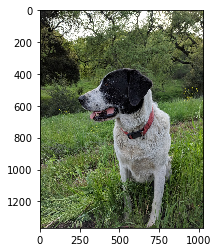

In [3]:
plt.imshow(full)

Lets upload now the subset of the image, its a template of the larger image we are searching...

In [8]:
face = cv2.imread("C:\\Users\\JERRY\\Downloads\\Computer-Vision-with-Python\\Computer-Vision-with-Python\\DATA\\sammy_face.jpg")
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

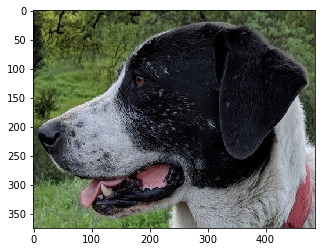

In [9]:
plt.imshow(face)

Now 2 important things to notice here... notice the dimension of the face.

In [10]:
face.shape

(375, 486, 3)

THis dimension is the exact same size in the original full image if we look in to the full image...

In [11]:
full.shape

(1367, 1025, 3)

Something that basically restricted in template matching, is that we should have the exact same image that we are looking for in the larger image... That is why its a general form of object detection...

so the face image will be go over the full image pixel by pixel and try to match it with the pixels...

# eval :

In [12]:
sum([1,2,3])

6

In [13]:
mystring = 'sum'

In [15]:
sum(mystring)    # it doesnot work like this... but

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [16]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [17]:
myfunc = eval(mystring)

In [18]:
myfunc([1,2,3])

6

In [26]:

# All the 6 methods for comparison in a list we can use for our TEMPLATE MATCHING
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

Notice that the above methods are all strings... and we are gonna use eval function to use strings as functions...

In [27]:
### We are gonna make a for loop which goes through each of this methods..and uses template matching for that particualr use...

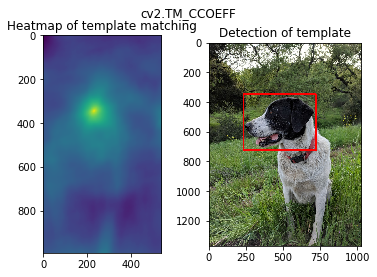

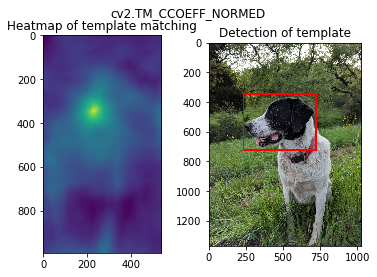

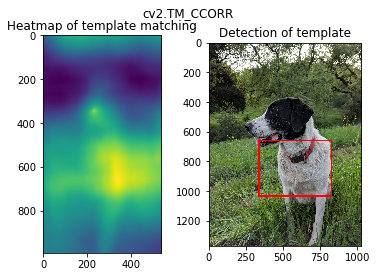

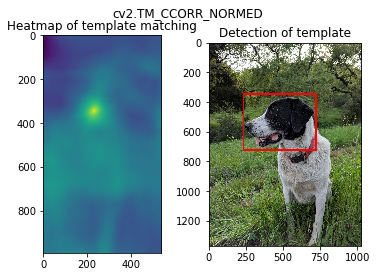

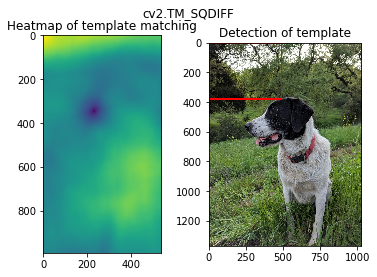

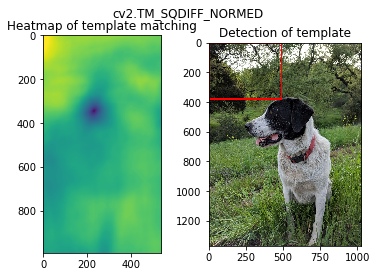

In [28]:
for m in methods:
    
    #create a copy of the full image...
    full_copy = full.copy()
    
    method = eval(m)  #as we loop through methods.. we consider each stirng as a funciton...
    
    #The way we are performing Template matching...
    res = cv2.matchTemplate(full_copy,face,method)
    
    #cv2.minMaxLoc(res) is a function in OpenCV that finds the minimum and maximum values (min_val, max_val) 
#     in the result matrix (res) from the template matching, along with their locations (min_loc, max_loc).
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)   # tuple unpacking
    
    #Different template matching methods have different ways of defining a "match." Here:
    
    #For cv2.TM_SQDIFF and cv2.TM_SQDIFF_NORMED methods, a lower value indicates a better match, 
#     so the location of the best match will be min_loc.

#For other methods, higher values indicate a better match, so the location of the best match will be max_loc.


    if method is [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc  # (x,y)
    else:
        top_left = max_loc
        
    height,width,channels = face.shape
    
    bottom_right = (top_left[0]+width, top_left[1] + height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    # Plot and show the images
    
    plt.subplot(121)   #it just says,,, give me the one row by two columns, so we have two images right next to
    plt.imshow(res)                   # each other,and the last one suggest grab the first one...
    plt.title("Heatmap of template matching")
    
    
    plt.subplot(122)
    plt.imshow(full_copy)   # now it has the rectangle drawed on it as we did...
    plt.title("Detection of template")
    
    #we title everything with the method
    plt.suptitle(m)
    
    plt.show()    # plt.show() is necessary to actually render the figure with both images and their titles.
#     Without this, the display wouldn’t appear, 
#     or the images and titles might overwrite each other if there are multiple plots in the same loop.
    
    print('\n')
    print('\n')

### What this res actually going to do...

my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full,face,my_method)

plt.imshow(res)

It shows the heat map, what it does is, it has higher values where it thinks it found the highest correlation of the image provided, basically results depend on the which method we are using..

what we are going to do is , calculate the max and min value of this heat map as well as max and min value locaiton and we use those to draw out the red rectangle for where it thinks it found the match...